# Практическая работа №2: Исследование подгрупп сетей. Сети аффилированности.
Выполнила студентка гр. 0382 Деткова Анна. Вариант 29

## Цель работы
Овладеть навыками работы с математическими пакетами для исследования подгрупп в социальных сетях, а также моделирования, отображения и анализа сетей аффилированности.

## Основные теоретические положения

### Определения:
* _n-клика_ - максимальный подграф, в котором наибольшее геодезическое расстояние между любыми двумя узлами не превышает n.

* _n-клан_ - n-клика, в которой геодезическое расстояние между всеми узлами в подграфе не превышает n для путей внутри подграфа.

* _n-клуб_ - максимальный подграф диаметра меньше либо равно n.

* _k-ядро_ - максимальный подграф, в котором каждая вершина связана минимум с _k_ другими вершинами этого же подграфа.

* _k-плекс_ - максимальный подграф, содержащий $g_s$ узлов, в котором каждый узел смежен с не менее чем с $g_s - k$ узлами подграфа.

* _Полупуть_ от узла _i_ до узла _j_ - последовательность различных узлов, где все последовательные пары узлов соединены дугой от первого ко второму или наоборот.

* _Модулярность_ - характеристика структуры сети, в частности степень кластеризации узлов, когда внутри кластера наблюдается много узлов, а между кластерами мало узлов. показатель модулярности определяется как разница между долей связей внутри группы и ожидаемой доли связей, если бы связи были размещены случайно.

* _Сеть аффилированности_ - сеть, в которой участники аффилированы друг с другом на основе сотрудничества в рамках какой-то группы или совместного участия в определенном событии. Сеть состоит из двух измерений.

* _Гиперграф_ - обобщение понятия графа: гиперграф состоит из множества объектов и множества подмножеств объектов, в котором каждый объект принадлежит хотя бы одному подмножеству, причем ни одно подмножество не является пустым.

$\cal {H = H(A, B)}$, где $\cal{A} = \{a_1, ..., a_n\}$ - множество объектов; $\cal{B} = \{b_1, ..., b_n\}$ - множество ребер

* _Двойственный гипеграф_ для гипперграфа $\cal {H = H(A, B)}$:

$\cal {H* = H(B, A)}$, где $\cal{A} = \{a_1, ..., a_n\}$ - множество ребер; $\cal{B} = \{b_1, ..., b_n\} - множество объектов$

* Матрица соучастия акторов:

$X^{\cal{N}} = \{x_{ij}^{\cal{N}} \}$

$x_{ij}^{\cal{N}} = \sum_{k = 1}^{h} a_{ik}a_{jk}$

* Матрица перекрытия событий:

$X^{\cal{M}} = \{x_{kl}^{\cal{M}} \}$

$x_{kl}^{\cal{M}} = \sum_{i = 1}^{g} a_{ik}a_{jl}$

* _Степень участия_ - количество событий, с которым связан каждый актор.

$a_{i+} = \sum_{j = 1}^{h} a_{ij} = x_{ii}^{\cal{N}}$

* _Размер событий:_

$a_{+j} = \sum_{i = 1}^{g} a_{ij} = x_{ii}^{\cal{M}}$

* _Средний размер событий_ - среднее количество акторов в каждом событии или средняя степень узлов, прндставляющих события в двудольном графе.

$\overline {a}_{ij} = \frac{1}{h} \sum_{j = 1}^{h} x_{jj}^{\cal{M}}$

* _Связная сеть аффилированности_ - сеть, в которой все пары узлов достижимы.

* _Диаметр аффилированной сети_ -длина самого длинного пути между любой парой акторов и/или событий.

* _Клика уровня с в взвешенном графе_ - максимальный полный подграф из трех или более узлов, все из которых являются смежными на уровне _c_, то есть между всеми парами узлов есть ребра со значениями, большими или равными _c_.

* _Клика уровня с для отношения соучастия_ - подграф, в котором все пары акторов совместно участвуют не менее чем в _c_ событиях.

* _Клика уровня с для отношения перекрытия_ - подграф, в котором все пары событий имеют не менее _с_ общих членов.

### Свойства сетей аффилированности:
1. Количество перекрывающихся связей между событиями частично зависит от количества событий, к которым принадлежат акторы.

2. Количество связей соучастия между акторами частично зависит от размера событий.

3. Актор, принадлежащий $a_{i+}$ событиям, создает $C_{a_{i+}}^2$ парных связей между событиями.

4. Событие с участиеми $a_{+j}$ участников создает $C_{a_{+о}}^2$ связей между парами акторов.

5. Плотность для дихотомического отношения - доля присутствующих связей.

6. Плоность для ценностных отношений - среднее значение связей.

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести анализ заданных социальных сетей на предмет подгрупп. Провести исследование сети аффилированности CEO. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы
Язык программирования – R.

### 0. Установим  требуемые пакеты и подключим их. 

In [ ]:
install.packages("igraph")
install.packages("RBGL")
library(igraph)
library(RBGL)

### 1. Из файла florentine_business.csv (для нечётных вариантов) извлечь социоматрицу с помощью соответствующих функций. Отобразить сеть с помощью одного из алгоритмов укладки.

Социоматрица была считана с помощью функции $read.csv()$. Далее полученные данные ($data.frame$) были представлены как матрица с помощью функции $as.matrix()$, полученная сеть была отображена с помощью алгоритма Фрюхтермана-Рейнгольда по укладке сети.

,Acciaiuoli,Albizzi,Barbadori,Bischeri,Castellani,Ginori,Guadagni,Lamberteschi,Medici,Pazzi,Peruzzi,Pucci,Ridolfi,Salviati,Strozzi,Tornabuoni
Acciaiuoli,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Albizzi,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Barbadori,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0
Bischeri,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0
Castellani,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
Ginori,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
Guadagni,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
Lamberteschi,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0
Medici,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
Pazzi,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


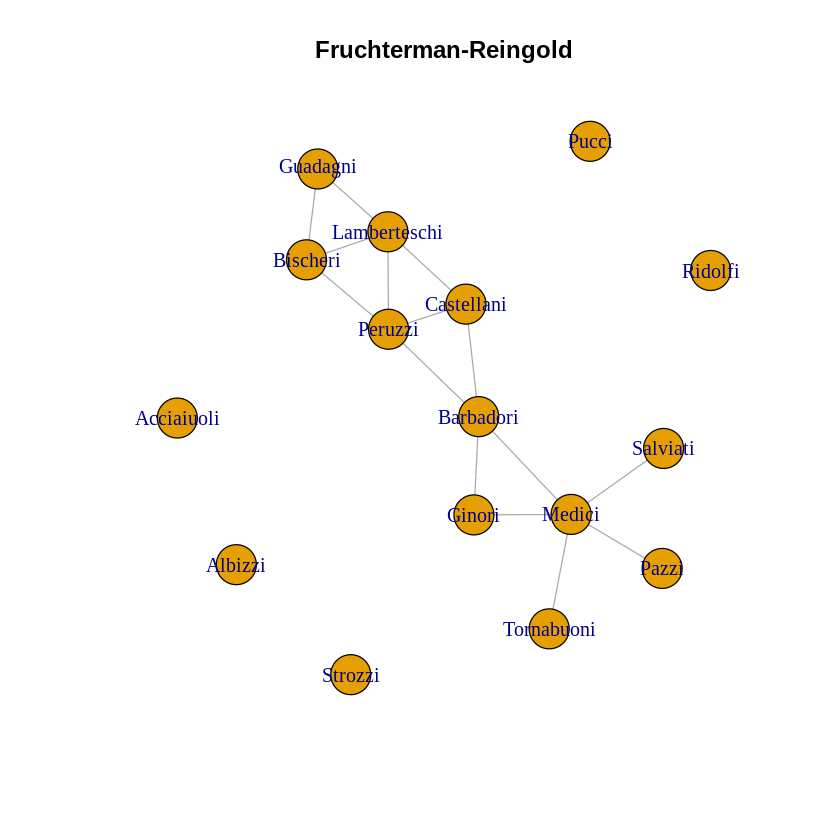

In [12]:
data <- read.csv('florentine_business.csv', header = TRUE, comment.char = '#')

# представили считанный как матрицу для дальнейшего удобства в работе
data <- as.matrix(data)
rownames(data) <- colnames(data)
data

graph <- graph.adjacency(data, mode = "undirected")
plot(graph, layout=layout_with_fr(graph), main="Fruchterman-Reingold")

### 2. Исследовать данную сеть на предмет подгрупп с помощью:
* n-клик;
* n-кланов;
* k-ядер.

Указать какие подгруппы поучились. Сделать выводы.

In [17]:
#n-клики
nCliques <- kCliques(igraph.to.graphNEL(graph))
nCliques


#n-кланы
nclan <- function(g, n, ncliques){
    E(g)$weight <- 1 #just in case g has weights - does not modify original graph
    n.cand <- ncliques[[n]] #n-clique candidates to be an n-clan
    n.clan <- list() #initializes a list to store the n-clans
    n.clan.i <- 1 #initializes a list pointer
    for (n.cand.i in 1:length(n.cand)){ #loop over all of the candidates
        g.n.cand <- induced_subgraph(g,n.cand[[n.cand.i]]) #get the subgraph
        if (diameter(g.n.cand)<=n){ #check diameter of the subgraph
          n.clan[[n.clan.i]] <- n.cand[[n.cand.i]] #add n-clan to the list
          n.clan.i <- n.clan.i+1 #increment list pointer
        }
      }
    return(n.clan) #return the entire list
}

nclans <- function(g, ncliques){
    result <- c()
    for (i in names(ncliques)){
        result[[i]] <- nclan(g, i, ncliques)
    }
    return(result)
}

nClans <- nclans(graph, nCliques)

#k-ядра
inf <- coreness(graph, mode= "all")
kKernels <- lapply(0:max(as.integer(inf)), function(x) names(inf)[which(as.integer(inf) >= x)])
kKernels

#### ***n-клики***

---

*1-клики*

1. Barbadori, Castellani, Peruzzi
2. Barbadori, Ginori, Medici   
3. Bischeri, Guadagni, Lamberteschi
4. Bischeri, Lamberteschi, Peruzzi
5. Castellani, Lamberteschi, Peruzzi
6. Medici, Pazzi
7. Medici, Salviati
8. Medici, Tornabuoni


*2-клики*

1. Barbadori, Bischeri, Castellani, Lamberteschi, Peruzzi
2. Barbadori, Castellani, Ginori, Medici, Peruzzi
3. Bischeri, Castellani, Guadagni, Lamberteschi, Peruzzi
4. Barbadori, Ginori, Medici, Pazzi, Salviati, Tornabuoni


*3-клики*

1. Barbadori, Bischeri, Castellani, Ginori, Lamberteschi, Medici, Peruzzi
2. Barbadori, Bischeri, Castellani, Guadagni, Lamberteschi, Peruzzi
3. Barbadori, Castellani, Ginori, Medici, Pazzi, Peruzzi, Salviati, Tornabuoni


*4-клики*

1. Barbadori, Bischeri, Castellani, Ginori, Guadagni, Lamberteschi, Medici, Peruzzi
2. Barbadori, Bischeri, Castellani, Ginori, Lamberteschi, Medici, Pazzi, Peruzzi, Salviati, Tornabuoni


*5-клики*

1. Barbadori, Bischeri, Castellani, Ginori, Guadagni, Lamberteschi, Medici, Pazzi, Peruzzi, Salviati, Tornabuoni

---

#### ***n-кланы***

---

*1-кланы*

1. Barbadori, Castellani, Peruzzi
2. Barbadori, Ginori, Medici   
3. Bischeri, Guadagni, Lamberteschi
4. Bischeri, Lamberteschi, Peruzzi
5. Castellani, Lamberteschi, Peruzzi
6. Medici, Pazzi
7. Medici, Salviati
8. Medici, Tornabuoni


*2-кланы*

1. Barbadori, Bischeri, Castellani, Lamberteschi, Peruzzi
2. Barbadori, Castellani, Ginori, Medici, Peruzzi
3. Bischeri, Castellani, Guadagni, Lamberteschi, Peruzzi
4. Barbadori, Ginori, Medici, Pazzi, Salviati, Tornabuoni


*3-кланы*

1. Barbadori, Bischeri, Castellani, Ginori, Lamberteschi, Medici, Peruzzi
2. Barbadori, Bischeri, Castellani, Guadagni, Lamberteschi, Peruzzi
3. Barbadori, Castellani, Ginori, Medici, Pazzi, Peruzzi, Salviati, Tornabuoni


*4-кланы*

1. Barbadori, Bischeri, Castellani, Ginori, Guadagni, Lamberteschi, Medici, Peruzzi
2. Barbadori, Bischeri, Castellani, Ginori, Lamberteschi, Medici, Pazzi, Peruzzi, Salviati, Tornabuoni


*5-кланы*

1. Barbadori, Bischeri, Castellani, Ginori, Guadagni, Lamberteschi, Medici, Pazzi, Peruzzi, Salviati, Tornabuoni

---

#### ***k-ядра***

---

*0-ядра*

Acciaiuoli, Albizzi, Barbadori, Bischeri, Castellani, Ginori, Guadagni, Lamberteschi, Medici, Pazzi, Peruzzi, Pucci, Ridolfi, Salviati, Strozzi, Tornabuoni

*1-ядра*

Barbadori, Bischeri, Castellani, Ginori, Guadagni, Lamberteschi, Medici, Pazzi, Peruzzi, Salviati, Tornabuoni

*2-ядра*

Barbadori, Bischeri, Castellani, Ginori, Guadagni, Lamberteschi, Medici, Peruzzi


####*Выводы:*

Вся сеть (без изолированных вершин) является 5-кликой, которая включает в себя 4-, 3-, 2- и 1-клики. С уменьшением k в k-клике уменьшается количество акторов в клике, но связь между акторами более тесная в этом случае. Набор n-кланов совпал с набором n-клик, значит, все связи в n-кликах были внутри подграфов. Вся сеть представляет из себя 0-ядро, значит, есть акторы, которые не связаны ни с одним актором из сети (одиночные вершины). Есть подгруппа (подграф), которая является 2-ядром, то есть каждый актор в этой подсети связан как минимум с двумя другими акторами этой же подсети, связь в этой подгруппе самая сильная.

### 3. С помощью библиотеки igraph исследовать алгоритмы обнаружения сообществ в зависимости от номера варианта:
(1) Edge-betweenness, Leading eigenvector, Fast-greedy;

(2) Spinglass, Walktrap, Label propagation;

(3) InfoMAP, Louvain, Optimal.

Кратко объяснить суть каждого алгоритма. Вывести значение модулярности и отобразить полученные сообщества. Сделать выводы.

$29\mod3+1 = 3$ - 3 вариант: (3) InfoMAP, Louvain, Optimal

Алгоритм *Infomap* пытается минимизировать функцию стоимости (ожидаемую длину описания траектории случайного блуждающего объекта).

Алгоритм *Louvain* нахождит структуру сообщества путем многоуровневой оптимизации модульности. Он основан на мере модульности и иерархическом подходе. Изначально каждая вершина назначается сообществу самостоятельно. На каждом этапе вершины переназначаются сообществам локальным жадным образом: каждая вершина перемещается в сообщество, с которым она достигает наибольшего вклада в модульность. Когда ни одна вершина не может быть переназначена, каждое сообщество считается вершиной само по себе, и процесс начинается снова с объединенных сообществ. Процесс останавливается, когда остается только одна вершина или когда модульность больше не может быть увеличена за шаг.

Алгоритм Optimal вычисляет оптимальную структуру сообщества для графа с точки зрения максимальной оценки модулярности. Расчет выполняется путем преобразования задачи максимизации модулярности в задачу целочисленного программирования и последующего вызова библиотеки GLPK для ее решения.

|Algorithm|Modularity|Number of communities|
|---------|----------|---------------------|
| infoMAP |0.3644444 |        7            |
| Louvain |0.3644444 |        7            |
| Optimal |0.3644444 |        7            |

In [ ]:
#infoMAP
infoMAP <- cluster_infomap(graph)
modularity(cl_infoMAP)
length(communities(cl_infoMAP))
plot(infoMAP, graph, layout=layout_with_kk(graph), main="Algorithm InfoMAP")

#Louvain
louvain <-cluster_louvain(graph)
modularity(louvain)
length(communities(louvain))
plot(louvain, graph, layout=layout_with_kk(graph), main="Algorithm Louvain")

#Optimal
optimal <- cluster_optimal(graph)
modularity(optimal)
length(communities(optimal))
plot(optimal, graph, layout=layout_with_kk(graph), main="Algorithm Optimal")

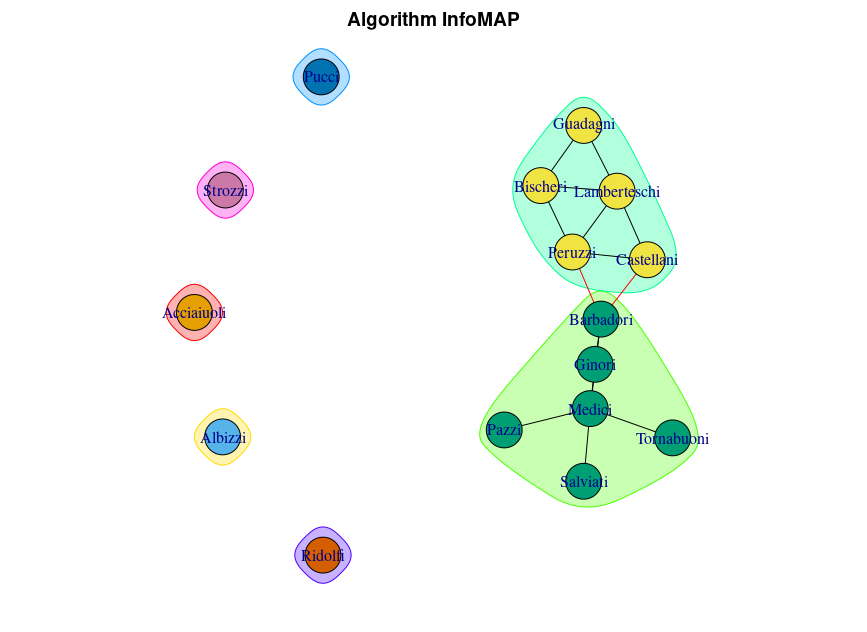

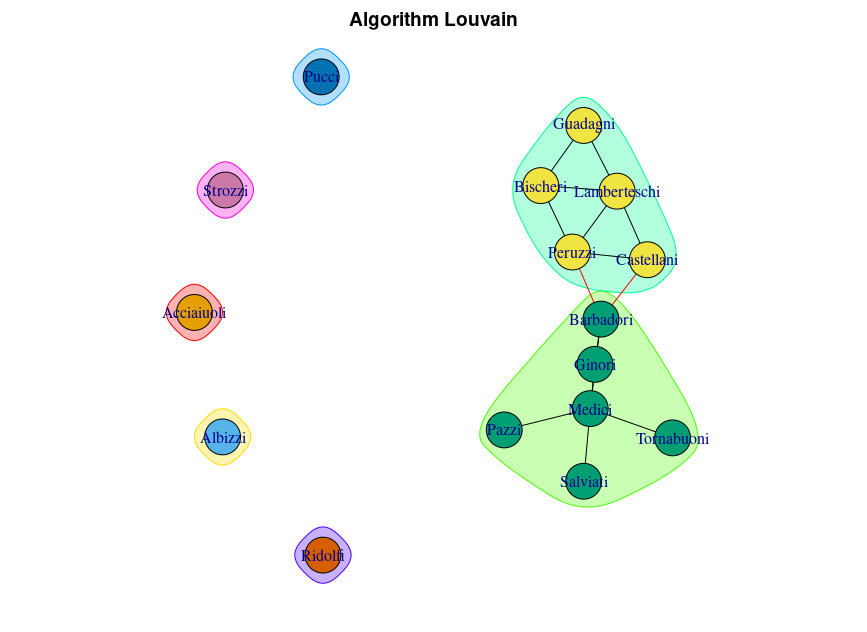

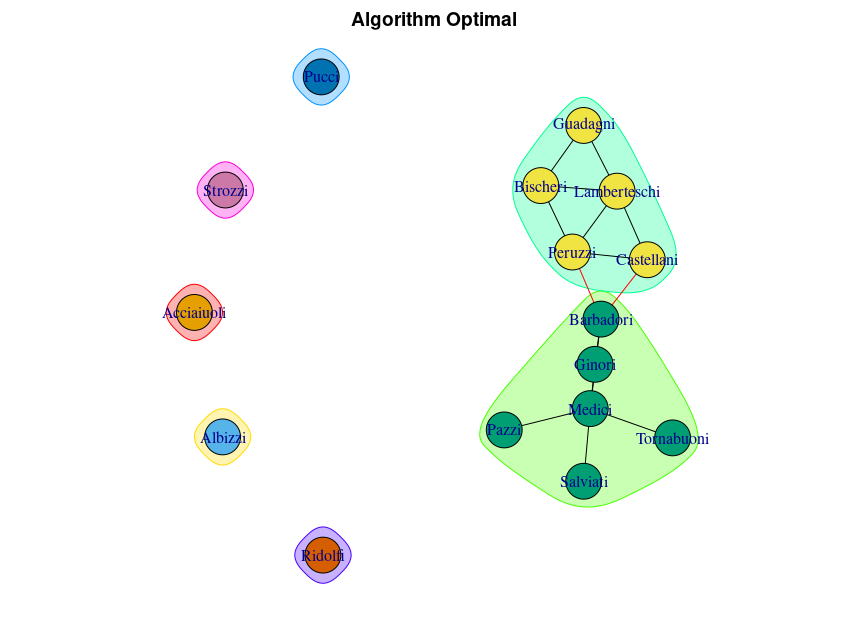

### 4. Из файла ceo.csv извлечь матрицу инцидентности с помощью соответствующих функций. Отобразить полученную матрицу.

$N_i$ - событие (столбец), $M_j$ - актор (строка).

In [ ]:
data <- data.matrix(read.csv('ceo.csv', comment.char = '#', header = FALSE))
rownames(data) <- paste('M', 1:nrow(data), sep='');
colnames(data) <- paste('N', 1:ncol(data), sep='');
data

||N1| N2| N3| N4| N5| N6| N7| N8| N9| N10| N11| N12| N13| N14| N15|
--|--|---|---|---|---|---|---|---|---|----|----|----|----|----|----|
M1|0  |0 | 1 | 1|  0 | 0 | 0 | 0 | 1 |  0 |  0 |  0 | 0  | 0  | 0  |
M2|0 | 0 | 1 | 0 | 1 | 0 | 1 | 0 | 0 |  0 |  0 |  0 |  0 |  0 |  0 |
M3| 0|  0|  1|  0|  0|  0|  0|  0|  0|   0|   0|   1|   0|   0|   0|
M4|0 | 1 | 1 | 0 | 0 | 0 | 0 | 0 | 0 |  0 |  0 |  0 |  0 |  0 |  1 |
M5|0 | 0 | 1 | 0 | 0 | 0 | 0 | 0 | 0 |  0 |  0 |  0 |  1 |  1 |  0 |
M6|0 | 1 | 1 | 0 | 0 | 0 | 0 | 0 | 0 |  0 |  0 |  0 |  0 |  1 |  0 |
M7|0|  0|  1|  1|  0 | 0 | 0 | 0 | 0|   1|   1|   0 |  0 |  0 |  0|
M8|0|  0|  0|  1|  0 | 0 | 1 | 0  |0 |  1 |  0|   0|   0|   0 |  0|
M9|1|  0|  0|  1|  0 | 0 | 0 | 1  |0   |1   |0   |0  | 0   |0   |0
M10|0|  0|  1|  0|  0 | 0 | 0 | 0  |1 |  0 |  0 |  0|   0 |  0 |  0|
M11|0|  1|  1|  0|  0 | 0 | 0 | 0  |1  | 0  | 0   |0  | 0   |0   |0
M12|0| 0|  0 | 1 | 0  |0  |1  | 0  |0 |  0 |  0 |  0 |  0 |  0 |  0
M13|0|  0|  1|  1|  1 | 0 | 0 | 0  |1   |0  | 0  | 0   |0   |0   |0
M14|0|  1|  1|  1|  0 | 0 |0  | 0  | 0  | 0 |  1|   1|   1|   0|   1
M15|0|  1|  1|  0|  0 | 1 | 0 | 0 | 0   |0   |0   |0   |1   |0   |1
M16|0| 1 | 1 | 0 | 0  |1  |0  | 1  |0  | 0  | 0 |  0   |0 |  1 |  0
M17|0|  1|  1|  0|  1 | 0 | 0 | 0 | 0 |  0   |1  | 1   |0   |0   |1
M18|0|  0|  0|  1|  0 | 0 | 0 | 0  |1   |0|   0   |1   |1 |  0 |  1
M19|1|  0|  1|  1|  0 | 0 | 1 | 0  |1  | 0 |  0   |0   |0   |0   |0
M20|0|  1|  1|  1| 0  |0  |0  | 0  |0 |  0  | 1  | 0   |0 |  0|  1
M21|0|  0 | 1 | 1 | 0  |0  |0  | 1  |0   |0   |0 |  0  | 0   |0   |0
M22|0|  0 | 1 | 0 | 0  |0  |0  | 1  |0  | 0|   0|   0  | 0  | 0 |  1
M23|0|  1 | 1 | 0 | 0  |1  |0  | 0  |0 |  0 |  0   |0  | 0  | 0  | 1
M24|1 | 0 | 1 | 1 | 0  |1  |0  | 0  |0  | 0  | 0  | 0  | 0  | 0  | 1
M25|0|  1 | 1 | 0 | 0  |0  |0  | 0  |0   |0   |0 |  0  | 1  | 0 |  0
M26|0|  1 | 1 |  0| 0  |0  |0  | 0  |0  | 0   |0|   1  | 0  | 0 |  0




### 5. Отобразить сеть в виде биграфа.

In [ ]:
ceo.graph <- graph.incidence(data, mode = "all")

vcol <- rep("green", vcount(ceo.graph))
vcol[unlist(V(ceo.graph)$type)] <- "red"

#выводим граф
plot(ceo.graph, vertex.color=vcol)


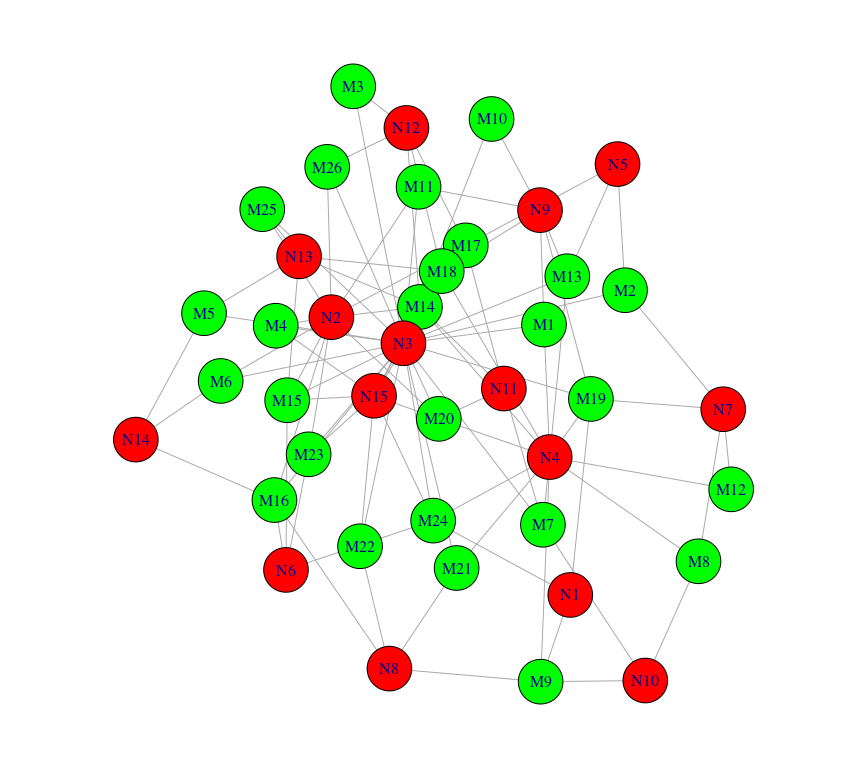

### 7. Представить сеть аффилированности в виде двух одномодальных сетей: сеть соучастия и сеть перекрытия событий. Представить полученные сети в виде ценностных матриц и взвешенных графов. Сделать выводы.

In [ ]:
#Сеть соучастия
compl <- data %*% t(data)
compl
complGraph <- graph.adjacency (compl, mode='undirected',weighted=TRUE)
plot(complGraph, edge.label=E(complGraph)$weight, layout=layout_with_kk)


#Сеть перекрытия событий
event <- t(data) %*% data
event
eventGraph <- graph.adjacency (event, mode='undirected', weighted=TRUE)
plot(eventGraph, edge.label=E(eventGraph)$weight, layout=layout_with_kk)


---
####Сеть соучастия акторов:

---

|     | M1 | M2 | M3 | M4 | M5 | M6 | M7 | M8 | M9 | M10 | M11 | M12 | M13 | M14 | M15 | M16 | M17 | M18 | M19 | M20 | M21 | M22 | M23 | M24 | M25 | M26 |
|-----|----|----|----|----|----|----|----|----|----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|-----|
| M1  | 3  | 1  | 1  | 1  | 1  | 1  | 2  | 1  | 1  | 2   | 2   | 1   | 3   | 2   | 1   | 1   | 1   | 2   | 3   | 2   | 2   | 1   | 1   | 2   | 1   | 1   |
| M2  | 1  | 3  | 1  | 1  | 1  | 1  | 1  | 1  | 0  | 1   | 1   | 1   | 2   | 1   | 1   | 1   | 2   | 0   | 2   | 1   | 1   | 1   | 1   | 1   | 1   | 1   |
| M3  | 1  | 1  | 2  | 1  | 1  | 1  | 1  | 0  | 0  | 1   | 1   | 0   | 1   | 2   | 1   | 1   | 2   | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 2   |
| M4  | 1  | 1  | 1  | 3  | 1  | 2  | 1  | 0  | 0  | 1   | 2   | 0   | 1   | 3   | 3   | 2   | 3   | 1   | 1   | 3   | 1   | 2   | 3   | 2   | 2   | 2   |
| M5  | 1  | 1  | 1  | 1  | 3  | 2  | 1  | 0  | 0  | 1   | 1   | 0   | 1   | 2   | 2   | 2   | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 1   | 2   | 1   |
| M6  | 1  | 1  | 1  | 2  | 2  | 3  | 1  | 0  | 0  | 1   | 2   | 0   | 1   | 2   | 2   | 3   | 2   | 0   | 1   | 2   | 1   | 1   | 2   | 1   | 2   | 2   |
| M7  | 2  | 1  | 1  | 1  | 1  | 1  | 4  | 2  | 2  | 1   | 1   | 1   | 2   | 3   | 1   | 1   | 2   | 1   | 2   | 3   | 2   | 1   | 1   | 2   | 1   | 1   |
| M8  | 1  | 1  | 0  | 0  | 0  | 0  | 2  | 3  | 2  | 0   | 0   | 2   | 1   | 1   | 0   | 0   | 0   | 1   | 2   | 1   | 1   | 0   | 0   | 1   | 0   | 0   |
| M9  | 1  | 0  | 0  | 0  | 0  | 0  | 2  | 2  | 4  | 0   | 0   | 1   | 1   | 1   | 0   | 1   | 0   | 1   | 2   | 1   | 2   | 1   | 0   | 2   | 0   | 0   |
| M10 | 2  | 1  | 1  | 1  | 1  | 1  | 1  | 0  | 0  | 2   | 2   | 0   | 2   | 1   | 1   | 1   | 1   | 1   | 2   | 1   | 1   | 1   | 1   | 1   | 1   | 1   |
| M11 | 2  | 1  | 1  | 2  | 1  | 2  | 1  | 0  | 0  | 2   | 3   | 0   | 2   | 2   | 2   | 2   | 2   | 1   | 2   | 2   | 1   | 1   | 2   | 1   | 2   | 2   |
| M12 | 1  | 1  | 0  | 0  | 0  | 0  | 1  | 2  | 1  | 0   | 0   | 2   | 1   | 1   | 0   | 0   | 0   | 1   | 2   | 1   | 1   | 0   | 0   | 1   | 0   | 0   |
| M13 | 3  | 2  | 1  | 1  | 1  | 1  | 2  | 1  | 1  | 2   | 2   | 1   | 4   | 2   | 1   | 1   | 2   | 2   | 3   | 2   | 2   | 1   | 1   | 2   | 1   | 1   |
| M14 | 2  | 1  | 2  | 3  | 2  | 2  | 3  | 1  | 1  | 1   | 2   | 1   | 2   | 7   | 4   | 2   | 5   | 4   | 2   | 5   | 2   | 2   | 3   | 3   | 3   | 3   |
| M15 | 1  | 1  | 1  | 3  | 2  | 2  | 1  | 0  | 0  | 1   | 2   | 0   | 1   | 4   | 5   | 3   | 3   | 2   | 1   | 3   | 1   | 2   | 4   | 3   | 3   | 2   |
| M16 | 1  | 1  | 1  | 2  | 2  | 3  | 1  | 0  | 1  | 1   | 2   | 0   | 1   | 2   | 3   | 5   | 2   | 0   | 1   | 2   | 2   | 2   | 3   | 2   | 2   | 2   |
| M17 | 1  | 2  | 2  | 3  | 1  | 2  | 2  | 0  | 0  | 1   | 2   | 0   | 2   | 5   | 3   | 2   | 6   | 2   | 1   | 4   | 1   | 2   | 3   | 2   | 2   | 3   |
| M18 | 2  | 0  | 1  | 1  | 1  | 0  | 1  | 1  | 1  | 1   | 1   | 1   | 2   | 4   | 2   | 0   | 2   | 5   | 2   | 2   | 1   | 1   | 1   | 2   | 1   | 1   |
| M19 | 3  | 2  | 1  | 1  | 1  | 1  | 2  | 2  | 2  | 2   | 2   | 2   | 3   | 2   | 1   | 1   | 1   | 2   | 5   | 2   | 2   | 1   | 1   | 3   | 1   | 1   |
| M20 | 2  | 1  | 1  | 3  | 1  | 2  | 3  | 1  | 1  | 1   | 2   | 1   | 2   | 5   | 3   | 2   | 4   | 2   | 2   | 5   | 2   | 2   | 3   | 3   | 2   | 2   |
| M21 | 2  | 1  | 1  | 1  | 1  | 1  | 2  | 1  | 2  | 1   | 1   | 1   | 2   | 2   | 1   | 2   | 1   | 1   | 2   | 2   | 3   | 2   | 1   | 2   | 1   | 1   |
| M22 | 1  | 1  | 1  | 2  | 1  | 1  | 1  | 0  | 1  | 1   | 1   | 0   | 1   | 2   | 2   | 2   | 2   | 1   | 1   | 2   | 2   | 3   | 2   | 2   | 1   | 1   |
| M23 | 1  | 1  | 1  | 3  | 1  | 2  | 1  | 0  | 0  | 1   | 2   | 0   | 1   | 3   | 4   | 3   | 3   | 1   | 1   | 3   | 1   | 2   | 4   | 3   | 2   | 2   |
| M24 | 2  | 1  | 1  | 2  | 1  | 1  | 2  | 1  | 2  | 1   | 1   | 1   | 2   | 3   | 3   | 2   | 2   | 2   | 3   | 3   | 2   | 2   | 3   | 5   | 1   | 1   |
| M25 | 1  | 1  | 1  | 2  | 2  | 2  | 1  | 0  | 0  | 1   | 2   | 0   | 1   | 3   | 3   | 2   | 2   | 1   | 1   | 2   | 1   | 1   | 2   | 1   | 3   | 2   |
| M26 | 1  | 1  | 2  | 2  | 1  | 2  | 1  | 0  | 0  | 1   | 2   | 0   | 1   | 3   | 2   | 2   | 3   | 1   | 1   | 2   | 1   | 1   | 2   | 1   | 2   | 3   |


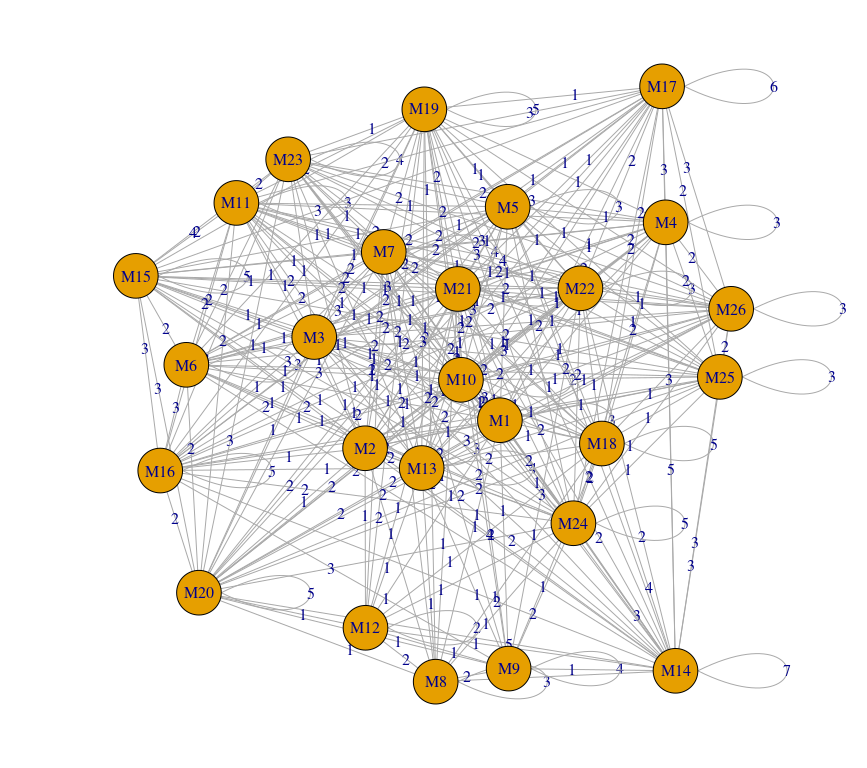

---

####Сеть перекрытия событий:

---

|     | N1 | N2 | N3 | N4 | N5 | N6 | N7 | N8 | N9 | N10 | N11 | N12 | N13 | N14 | N15 |
|-----|----|----|----|----|----|----|----|----|----|-----|-----|-----|-----|-----|-----|
| N1  | 3  | 0  | 2  | 3  | 0  | 1  | 1  | 1  | 1  | 1   | 0   | 0   | 0   | 0   | 1   |
| N2  | 0  | 11 | 11 | 2  | 1  | 3  | 0  | 1  | 1  | 0   | 3   | 3   | 3   | 2   | 6   |
| N3  | 2  | 11 | 22 | 8  | 3  | 4  | 2  | 3  | 5  | 1   | 4   | 4   | 4   | 3   | 8   |
| N4  | 3  | 2  | 8  | 12 | 1  | 1  | 3  | 2  | 4  | 3   | 3   | 2   | 2   | 0   | 4   |
| N5  | 0  | 1  | 3  | 1  | 3  | 0  | 1  | 0  | 1  | 0   | 1   | 1   | 0   | 0   | 1   |
| N6  | 1  | 3  | 4  | 1  | 0  | 4  | 0  | 1  | 0  | 0   | 0   | 0   | 1   | 1   | 3   |
| N7  | 1  | 0  | 2  | 3  | 1  | 0  | 4  | 0  | 1  | 1   | 0   | 0   | 0   | 0   | 0   |
| N8  | 1  | 1  | 3  | 2  | 0  | 1  | 0  | 4  | 0  | 1   | 0   | 0   | 0   | 1   | 1   |
| N9  | 1  | 1  | 5  | 4  | 1  | 0  | 1  | 0  | 6  | 0   | 0   | 1   | 1   | 0   | 1   |
| N10 | 1  | 0  | 1  | 3  | 0  | 0  | 1  | 1  | 0  | 3   | 1   | 0   | 0   | 0   | 0   |
| N11 | 0  | 3  | 4  | 3  | 1  | 0  | 0  | 0  | 0  | 1   | 4   | 2   | 1   | 0   | 3   |
| N12 | 0  | 3  | 4  | 2  | 1  | 0  | 0  | 0  | 1  | 0   | 2   | 5   | 2   | 0   | 3   |
| N13 | 0  | 3  | 4  | 2  | 0  | 1  | 0  | 0  | 1  | 0   | 1   | 2   | 5   | 1   | 3   |
| N14 | 0  | 2  | 3  | 0  | 0  | 1  | 0  | 1  | 0  | 0   | 0   | 0   | 1   | 3   | 0   |
| N15 | 1  | 6  | 8  | 4  | 1  | 3  | 0  | 1  | 1  | 0   | 3   | 3   | 3   | 0   | 9   |

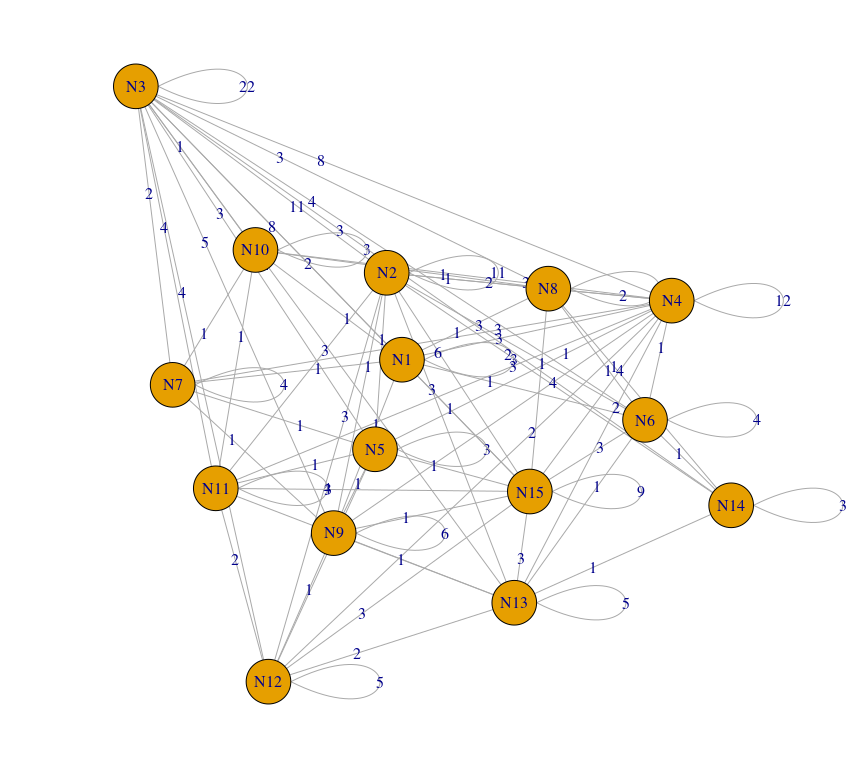

####Выводы:

По большей части каждый участник бывает на хотя бы одном событии с каждым из других участников. Пара разных участников имеет максимум 5 общих событий. Парой с наибольшим по числу участников является пара событий $N2$ и $N3$.

### 8. Вычислить степень участия для каждого актора, а также среднее количество событий, с которыми актор аффилирован. Сделать выводы.

In [ ]:
#степень участия:
degreeOfPart <- compl[row(compl) == col(compl)]
for(i in 1:length(degreeOfPart)){
    cat("Actor", i, "is linked to", degreeOfPart[i], "events.\n")
}

#среднее количество событий, с которыми актор аффилирован
meanAmount <- sum(degreeOfPart) / length(degreeOfPart)
cat("Mean number of events:", meanAmount)

Actor 1 is linked to 3 events.

Actor 2 is linked to 3 events.

Actor 3 is linked to 2 events.

Actor 4 is linked to 3 events.

Actor 5 is linked to 3 events.

Actor 6 is linked to 3 events.

Actor 7 is linked to 4 events.

Actor 8 is linked to 3 events.

Actor 9 is linked to 4 events.

Actor 10 is linked to 2 events.

Actor 11 is linked to 3 events.

Actor 12 is linked to 2 events.

Actor 13 is linked to 4 events.

Actor 14 is linked to 7 events.

Actor 15 is linked to 5 events.

Actor 16 is linked to 5 events.

Actor 17 is linked to 6 events.

Actor 18 is linked to 5 events.

Actor 19 is linked to 5 events.

Actor 20 is linked to 5 events.

Actor 21 is linked to 3 events.

Actor 22 is linked to 3 events.

Actor 23 is linked to 4 events.

Actor 24 is linked to 5 events.

Actor 25 is linked to 3 events.

Actor 26 is linked to 3 events.

---

Mean number of events: 3.769231

*Выводы:*

Каждый актор в среднем учавствует в 3-4 событиях. Актор, который учавствует в наибольшем числе событий - 14. В наимньшем - 1, 10, 12.

### 9. Вычислить размер и средний размер для каждого события. Сделать выводы.

In [ ]:
#Размер
size <- event[row(event) == col(event)]
for(i in 1:length(size)){
    cat("Event", i, "has size:", size[i], "\n")
}
#Средний размер
meanSize <- sum(size) / length(size)
cat("Mean size:", meanSize)

Event 1 has size: 3 

Event 2 has size: 11 

Event 3 has size: 22 

Event 4 has size: 12 

Event 5 has size: 3 

Event 6 has size: 4 

Event 7 has size: 4 

Event 8 has size: 4 

Event 9 has size: 6 

Event 10 has size: 3 

Event 11 has size: 4 

Event 12 has size: 5 

Event 13 has size: 5 

Event 14 has size: 3 

Event 15 has size: 9

---

Mean size: 6.533333

*Выводы:*

В среднем кждое событие посещает 6-7 акторов.Самое популярное среди акторов событие 3, его посещает 22 актора; самые не популярные - 1, 5, 10, 14, их посещает по 3 актора.

### 10. Вычислить плотность для соотношения соучастия и отношения перекрытия. Проинтерпретируйте полученные значения.

In [ ]:
# Плотность для соотношения соучастия:
densityPart <- (sum(compl)-sum(diag(compl)))/(nrow(compl)*(nrow(compl)-1))
cat("Плотность для соотношения соучастия: ", densityPart, '\n')

# Плотность для соотношения перекрытия
densityEvent <- (sum(event)-sum(diag(event)))/(nrow(event)*(nrow(event)-1))
cat("Плотность для соотношения перекрытия: ",densityEvent, '\n')


Плотность для соотношения соучастия: 1.565 
Плотность для соотношения перекрытия: 1.909524 


Плотность для соотношения соучастия: 1.412308

---

Плотность для соотношения перекрытия: 1.485714

*Выводы:*

В среднем, каждая пара различных акторов имеет 1-2 общих события. В среднем, каждая пара различных событий имеет 1-2 общих акторов.

### 11. Определить диаметр сети аффилированности.

In [ ]:
#Диаметр сети аффилированности
diam <- diameter(ceo.graph)
cat("Диаметр сети аффилированности: ", diam)

Диаметр сети аффилированности:  5

###12. Определить клики уровня $c = \{4, 3\}$ для отношения соучастия и клики уровня $c = \{6, 5, 4, 3, 2\}$ для отношения перекрытия событий. Сделать выводы.

In [ ]:
cat("Для соучастия уровня 3\n")
# удаляем ребра, вес которых < 3
complSubGraph <- delete.edges(complGraph, E(complGraph)[E(complGraph)$weight < 3]) 
max_cliques(complSubGraph, min=3)
cat("Для соучастия уровня 4\n")
# удаляем ребра, вес которых < 4
complSubGraph <- delete.edges(complGraph, E(complGraph)[E(complGraph)$weight < 4])
max_cliques(complSubGraph, min=3)


cat("Для перекрытия уровня 6\n")
# удаляем ребра, вес которых < 6
eventSubGraph <- delete.edges(eventGraph, E(eventGraph)[E(eventGraph)$weight < 6])
max_cliques(eventSubGraph, min=3)
cat("Для перекрытия уровня 5\n")
# удаляем ребра, вес которых < 5
eventSubGraph <- delete.edges(eventGraph, E(eventGraph)[E(eventGraph)$weight < 5])
max_cliques(eventSubGraph, min=3)
cat("Для перекрытия уровня 4\n")
# удаляем ребра, вес которых < 4
eventSubGraph <- delete.edges(eventGraph, E(eventGraph)[E(eventGraph)$weight < 4])
max_cliques(eventSubGraph, min=3)
cat("Для перекрытия уровня 3\n")
# удаляем ребра, вес которых < 3
eventSubGraph <- delete.edges(eventGraph, E(eventGraph)[E(eventGraph)$weight < 3])
max_cliques(eventSubGraph, min=3)
cat("Для перекрытия уровня 2\n")
# удаляем ребра, вес которых < 2
eventSubGraph <- delete.edges(eventGraph, E(eventGraph)[E(eventGraph)$weight < 2])
max_cliques(eventSubGraph, min=3)

*Для соучастия уровня 3:*

1. M1, M13, M19
2. M7, M14, M20
3. M16, M15, M23
4. M25, M14, M15
5. M26, M14, M17
7. M24, M14, M23, M20, M15
8. M14, M4, M23, M20, M17, M15

---

*Для соучастия уровня 4:*

1. M20, M14, M17

---

*Для перекрытия уровня 6:*

1. N2, N3, N15

---

*Для перекрытия уровня 5:*

1. N2, N3, N15

---

*Для перекрытия уровня 4:*

1. N15, N3, N2 
2. N15, N3, N4 
3. N4, N3, N9

---

*Для перекрытия уровня 3:*

1. N9, N3, N4
2. N13, N2, N15, N3 
3. N15, N3, N2, N6 
4. N15, N3, N2, N11
5. N15, N3, N2, N12
6. N15, N3, N4, N11


---

*Для перекрытия уровня 2:*

1. N1, N3, N4
2. N7, N3, N4
3. N8, N3, N4
4. N9, N3, N4
5. N14, N2, N3 
6. N6, N2, N15, N3 
7. N15, N2, N12, N4, N3, N11
8. N15, N2, N12, N4, N3, N13


*Выводы:*

Есть 7 групп акторов (не менее трёх в каждой), которые посещают не менее 3-х общих событий, наибольшая из этих групп (6 акторов) - директора под номерами 14, 4, 23, 20, 17 и 15. Не менее 4-х общих событий посещает лишь одна группа акторов - 20, 14, 17.

Среди событий есть 8 групп, которые посещают не менее 2-x общих акторов, наибольшая из этих групп (6 событий) - 15, 2, 12, 4, 3 и 13 (или 13). Среди событий есть 6 групп, которые посещают не менее 3-x общих акторов, 3 группы с 4-мя и более общими акторами и 1 группа (события 2, 3 и 15) с 5-ю или 6-ю и более общими акторами.

### 12. Для каждых пар событий определить отношение шансов. Сделать выводы.

In [ ]:
K.L <- t(data) %*% data
notK.notL <- (1-t(data))%*%(1-data)
notK.L <- (1-t(data))%*%data
K.notL <- t(data)%*%(1-data)
  
res <- c()
for(i in 2:nrow(K.L)){
   for(j in 1:(i-1)){
     cat(paste("Theta(N",i,", N",j,") = ", (K.L[i,j]*notK.notL[i,j])/(notK.L[i,j]*K.notL[i,j]),sep=""), "\n")
   }
}

Theta(N2, N1) = 0 

Theta(N3, N1) = 0.3 

Theta(N3, N2) = Inf 

Theta(N4, N1) = Inf 

Theta(N4, N2) = 0.111111111111111 

Theta(N4, N3) = 0 

Theta(N5, N1) = 0 

Theta(N5, N2) = 0.65 

Theta(N5, N3) = Inf 

Theta(N5, N4) = 0.545454545454545 

Theta(N6, N1) = 3.33333333333333 

Theta(N6, N2) = 5.25 

Theta(N6, N3) = Inf 

Theta(N6, N4) = 0.333333333333333 

Theta(N6, N5) = 0 

Theta(N7, N1) = 3.33333333333333 

Theta(N7, N2) = 0

Theta(N7, N3) = 0.1 

Theta(N7, N4) = 4.33333333333333 

Theta(N7, N5) = 3.33333333333333 

Theta(N7, N6) = 0 

Theta(N8, N1) = 3.33333333333333 

Theta(N8, N2) = 0.4 

Theta(N8, N3) = 0.473684210526316 

Theta(N8, N4) = 1.2 

Theta(N8, N5) = 0 

Theta(N8, N6) = 2.11111111111111 

Theta(N8, N7) = 0 

Theta(N9, N1) = 1.8 

Theta(N9, N2) = 0.2 

Theta(N9, N3) = 0.882352941176471 

Theta(N9, N4) = 3 

Theta(N9, N5) = 1.8 

Theta(N9, N6) = 0 

Theta(N9, N7) = 1.13333333333333 

Theta(N9, N8) = 0 

Theta(N10, N1) = 5.25 

Theta(N10, N2) = 0 

Theta(N10, N3) = 0.0476190476190476 

Theta(N10, N4) = Inf 

Theta(N10, N5) = 0 

Theta(N10, N6) = 0 

Theta(N10, N7) = 3.33333333333333 

Theta(N10, N8) = 3.33333333333333 

Theta(N10, N9) = 0 

Theta(N11, N1) = 0 

Theta(N11, N2) = 5.25 

Theta(N11, N3) = Inf 

Theta(N11, N4) = 4.33333333333333 

Theta(N11, N5) = 3.33333333333333 

Theta(N11, N6) = 0 

Theta(N11, N7) = 0 

Theta(N11, N8) = 0 

Theta(N11, N9) = 0 

Theta(N11, N10) = 3.33333333333333 

Theta(N12, N1) = 0 

Theta(N12, N2) = 2.4375 

Theta(N12, N3) = 0.666666666666667 

Theta(N12, N4) = 0.733333333333333 

Theta(N12, N5) = 2.375 

Theta(N12, N6) = 0 

Theta(N12, N7) = 0 

Theta(N12, N8) = 0 

Theta(N12, N9) = 0.8 

Theta(N12, N10) = 0 

Theta(N12, N11) = 6.33333333333333 

Theta(N13, N1) = 0 

Theta(N13, N2) = 2.4375 

Theta(N13, N3) = 0.666666666666667 

Theta(N13, N4) = 0.733333333333333 

Theta(N13, N5) = 0 

Theta(N13, N6) = 1.5 

Theta(N13, N7) = 0 

Theta(N13, N8) = 0 

Theta(N13, N9) = 0.8 

Theta(N13, N10) = 0 

Theta(N13, N11) = 1.5 

Theta(N13, N12) = 4 

Theta(N14, N1) = 0 

Theta(N14, N2) = 3.11111111111111 

Theta(N14, N3) = Inf 

Theta(N14, N4) = 0 

Theta(N14, N5) = 0 

Theta(N14, N6) = 3.33333333333333 

Theta(N14, N7) = 0 

Theta(N14, N8) = 3.33333333333333 

Theta(N14, N9) = 0 

Theta(N14, N10) = 0 

Theta(N14, N11) = 0 

Theta(N14, N12) = 0 

Theta(N14, N13) = 2.375 

Theta(N15, N1) = 0.9375 

Theta(N15, N2) = 4.8 

Theta(N15, N3) = 1.71428571428571 

Theta(N15, N4) = 0.9 

Theta(N15, N5) = 0.9375 

Theta(N15, N6) = 8 

Theta(N15, N7) = 0 

Theta(N15, N8) = 0.583333333333333 

Theta(N15, N9) = 0.3 

Theta(N15, N10) = 0 

Theta(N15, N11) = 8 

Theta(N15, N12) = 3.75 

Theta(N15, N13) = 3.75 

Theta(N15, N14) = 0 


*Выводы:*

Как видно из полученных значений - существуют такие пары событий, где актор аффилирован лишь с одним из событий или не аффилирован вовсе. Это пары событий, для которых значение получилось равным 0. Число таких пар преобладает.

Также существуют пары событий, где актор принадлежит сразу двум событиям, если принадлежит хотя бы одному из них. Это пары событий, для которых значение получилось равным Inf.

## Выводы

В ходе выполнения практической работы были проанализированы две сети: сеть бизнес-отношений между флорентийскими семьями и сеть аффилированности директоров компаний и клубов.

При работе с первой сетью было исследовано разделение сети на подгруппы: клики, кланы и и т.д, а также изучены алгоритмы нахождения сообществ в сети и оценивания показателя модулярности. Полученные выводы в заданиях действительно дают новую информацию об исходных данных.

При работе со второй сетью были применены на практике знания о сетях аффилированности: способы их представления, разделение на одномодальные сети и их анализ. Полученные выводы помогают узнать, как часто директора посещают различные клубы, какие клубы посещают чаще всего, сколько общих клубов посещают директора и, наоборот, сколько общих директоров имеют в качестве клиентов у себя различные клубы.